# Grade: /100 pts

# Assignment 7: Tree methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league (soccer) matches between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

*Do not forget to include labels in your figures.*

*Take advantage of `n_jobs=-1` where applicable.*

### <span style="color:yellow"> Global Toolbox </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk 
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 310
np.random.seed(seed)

### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span>.

**Points will be deducted if your answer is not in the variable mentioned above**

In [2]:
Data=pd.read_csv("PL_matches.csv")
beforeMatch = Data.iloc[:, 0:3].join(Data.iloc[:, 27:])
shape_vector = beforeMatch.shape
beforeMatch.tail()

,home_team,away_team,result_full,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,...,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away
3952,Liverpool,Brighton and Hove Albion,0-1,13.0,6.6,10.2,1.7,664.1,64.3,0.0,...,0.1,3.5,16.8,651.0,1.5,1.10,1.38,-6.0,0.52,0.67
3953,Burnley,Leicester City,1-1,20.2,4.0,11.2,2.3,362.7,41.5,0.0,...,0.0,4.5,17.7,679.0,1.8,1.73,1.15,15.0,0.77,0.58
3954,Crystal Palace,Manchester United,0-0,19.2,3.8,10.4,1.6,382.1,40.8,0.1,...,0.0,5.9,14.9,742.6,1.6,2.04,1.23,21.0,0.85,0.69
3955,Sheffield United,Aston Villa,1-0,20.4,4.7,12.3,2.1,386.1,41.4,0.1,...,0.1,5.3,13.3,587.0,1.7,1.58,1.08,12.0,0.67,0.42
3956,Newcastle United,Liverpool,0-0,23.4,3.9,10.4,1.7,357.2,38.8,0.0,...,0.0,6.5,13.1,844.5,0.7,2.47,1.33,17.0,1.20,0.87


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification. This variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. 
2. In which game was the greatest goal difference? What was the result of the game? Store the home team of the game in **home_team**, away in **away_team** and result in **game_result**.
3. Drop all variables related to the  result of the game including the name of the teams, except for the target.
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

**Hint:** To create the target variable you should use the split function from pandas. Take a look to the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html).


**Points will be deducted if your answer is not in the variable names mentioned above.**

In [3]:
#to check the colomn usage
print(beforeMatch['result_full'].unique())

['2-1' '3-0' '1-0' '0-0' '1-2' '2-2' '0-4' '0-1' '3-1' '1-1' '1-3' '2-5'
 '0-3' '2-0' '4-1' '3-3' '0-2' '4-2' '2-3' '4-3' '3-2' '4-0' '2-4' '5-1'
 '6-0' '0-6' '5-0' '1-4' '7-1' '5-3' '4-4' '0-5' '1-6' '5-2' '3-5' '1-5'
 '8-2' '6-1' '3-4' '7-3' '5-5' '8-0' '6-3' '7-0' '3-6' '4-5' '6-2' '5-4'
 '1-7' '7-2' '2-6' '0-9' '0-7' '9-0']


In [4]:
beforeMatch[['home_goals', 'away_goals']] = beforeMatch['result_full'].str.split('[^a-zA-Z0-9]+', expand=True)
beforeMatch['home_goals'] = pd.to_numeric(beforeMatch['home_goals'])
beforeMatch['away_goals'] = pd.to_numeric(beforeMatch['away_goals'])
beforeMatch = beforeMatch.assign(target=(beforeMatch['home_goals'] - beforeMatch['away_goals']).apply(
                            lambda x: 0 if x > 0 else
                                      1 if x < 0 else
                                      2))
print(beforeMatch.head())


           home_team             away_team result_full  clearances_avg_home  \
0          Blackpool  West Bromwich Albion         2-1                 38.4   
1          Liverpool       Manchester City         3-0                 29.8   
2  Manchester United               Arsenal         1-0                 29.1   
3         Stoke City           Aston Villa         2-1                 32.3   
4             Fulham               Chelsea         0-0                 38.7   

   corners_avg_home  fouls_conceded_avg_home  offsides_avg_home  \
0               4.6                     11.3                3.4   
1               5.6                     12.3                2.2   
2               6.1                     10.8                2.9   
3               4.0                     13.7                2.0   
4               5.0                     12.1                2.9   

   passes_avg_home  possession_avg_home  red_cards_avg_home  ...  \
0            407.9                 48.3               

In [5]:
max_goal_diff = (beforeMatch['home_goals'] - beforeMatch['away_goals']).abs().max()
max_goal_diff_row = beforeMatch[(beforeMatch['home_goals'] - beforeMatch['away_goals']).abs() == max_goal_diff].iloc[0]

home_team = max_goal_diff_row['home_team']
away_team = max_goal_diff_row['away_team']

if max_goal_diff_row['home_goals'] > max_goal_diff_row['away_goals']:
    game_result = 'home team won by ' + str(max_goal_diff_row['home_goals'] - max_goal_diff_row['away_goals']) + ' goal(s)'
elif max_goal_diff_row['home_goals'] < max_goal_diff_row['away_goals']:
    game_result = 'away team won by ' + str(max_goal_diff_row['away_goals'] - max_goal_diff_row['home_goals']) + ' goal(s)'
else:
    game_result = 'draw'
    
print('Game with greatest goal difference: ' + home_team + ' vs ' + away_team + ', ' + game_result)
beforeMatch.head()

Game with greatest goal difference: Southampton vs Leicester City, away team won by 9 goal(s)


,home_team,away_team,result_full,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,...,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,home_goals,away_goals,target
0,Blackpool,West Bromwich Albion,2-1,38.4,4.6,11.3,3.4,407.9,48.3,0.1,...,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,2,1,0
1,Liverpool,Manchester City,3-0,29.8,5.6,12.3,2.2,440.1,52.7,0.1,...,681.4,2.0,1.61,0.87,23.0,0.87,0.32,3,0,0
2,Manchester United,Arsenal,1-0,29.1,6.1,10.8,2.9,517.3,57.6,0.0,...,748.0,1.8,2.12,1.12,16.0,0.94,0.38,1,0,0
3,Stoke City,Aston Villa,2-1,32.3,4.0,13.7,2.0,256.0,35.7,0.0,...,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,2,1,0
4,Fulham,Chelsea,0-0,38.7,5.0,12.1,2.9,446.8,51.6,0.0,...,728.6,1.4,1.84,0.88,24.0,0.84,0.48,0,0,2


In [6]:
beforeMatch.columns = beforeMatch.columns.str.strip()
beforeMatch.drop(columns=['home_team','away_team','result_full','home_goals','away_goals'], inplace=True)
beforeMatch.head()

,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,...,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,target
0,38.4,4.6,11.3,3.4,407.9,48.3,0.1,4.4,18.8,619.1,...,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,0
1,29.8,5.6,12.3,2.2,440.1,52.7,0.1,5.3,24.0,659.5,...,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,0
2,29.1,6.1,10.8,2.9,517.3,57.6,0.0,5.6,17.3,726.1,...,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,0
3,32.3,4.0,13.7,2.0,256.0,35.7,0.0,4.0,18.3,442.0,...,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0
4,38.7,5.0,12.1,2.9,446.8,51.6,0.0,4.5,21.3,669.1,...,6.3,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,2


In [7]:
beforeMatch.target.value_counts()

0    1795
1    1189
2     973
Name: target, dtype: int64

**Written Answer:**

No, it is not a balanced DataSet because HOME Team wins more often than the other class.

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of columns and report only those with pairwise correlation absolute value greater than 0.9. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows (i.e., 3) is not deterministic. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.) 

|Index|Variable 1|Variable 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

  
- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- In the pairwise PCCs, identify those variables without the term "possession" in their names and drop them from the dataframe.


In [19]:
data = pd.read_csv("PL_matches.csv")

#compute the absolute correlation matrix
corr_matrix = data.corr().abs()

#get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#filter out the pairs with correlation less than 0.9
high_corr = upper.stack().loc[lambda x: x > 0.9].reset_index()

#rename the columns
high_corr.columns = ['variable_1', 'variable_2', 'PCC']
print(high_corr)

            variable_1           variable_2       PCC
0          home_passes         home_touches  0.982807
1      home_possession      away_possession  1.000000
2          away_passes         away_touches  0.981542
3      passes_avg_home  possession_avg_home  0.935083
4      passes_avg_home     touches_avg_home  0.990809
5  possession_avg_home     touches_avg_home  0.950461
6      passes_avg_away  possession_avg_away  0.934452
7      passes_avg_away     touches_avg_away  0.990702
8  possession_avg_away     touches_avg_away  0.949458


**Written Answer:**
Variables such as pass_avg_home and possession_avg_home can be highly correlated. This means that the more passes  the home team has, the longer the possession lasts, reflected in a higher percentage of possessions. Similarly shots_on_target_avg_home and goal_avg_home can be highly correlated. This is because the more shots hit the target, the more likely it is to score a goal. 

In [9]:

high_corr_dr = high_corr.drop(high_corr[(high_corr.variable_1.str.contains('possession')) | (high_corr.variable_2.str.contains('possession'))].index)
# print the result
print(high_corr_dr)

        variable_1        variable_2  correlation
0      home_passes      home_touches     0.982807
2      away_passes      away_touches     0.981542
4  passes_avg_home  touches_avg_home     0.990809
7  passes_avg_away  touches_avg_away     0.990702


### Q2.1 - <span style="color:red">[40]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Points will be deducted if your answer is not in the variable names mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

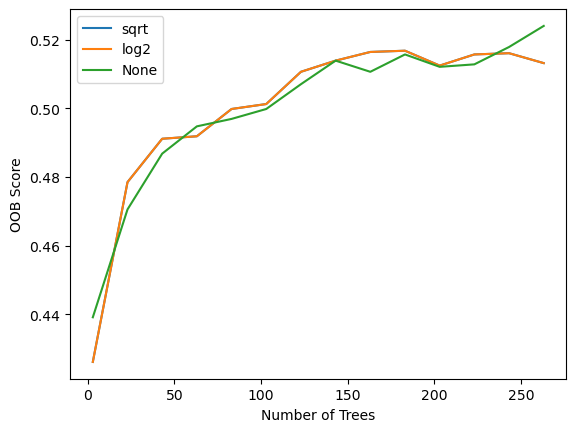

Accuracy: 0.5109427609427609
Confusion Matrix:
 [[413 110  29]
 [157 164  20]
 [164 101  30]]


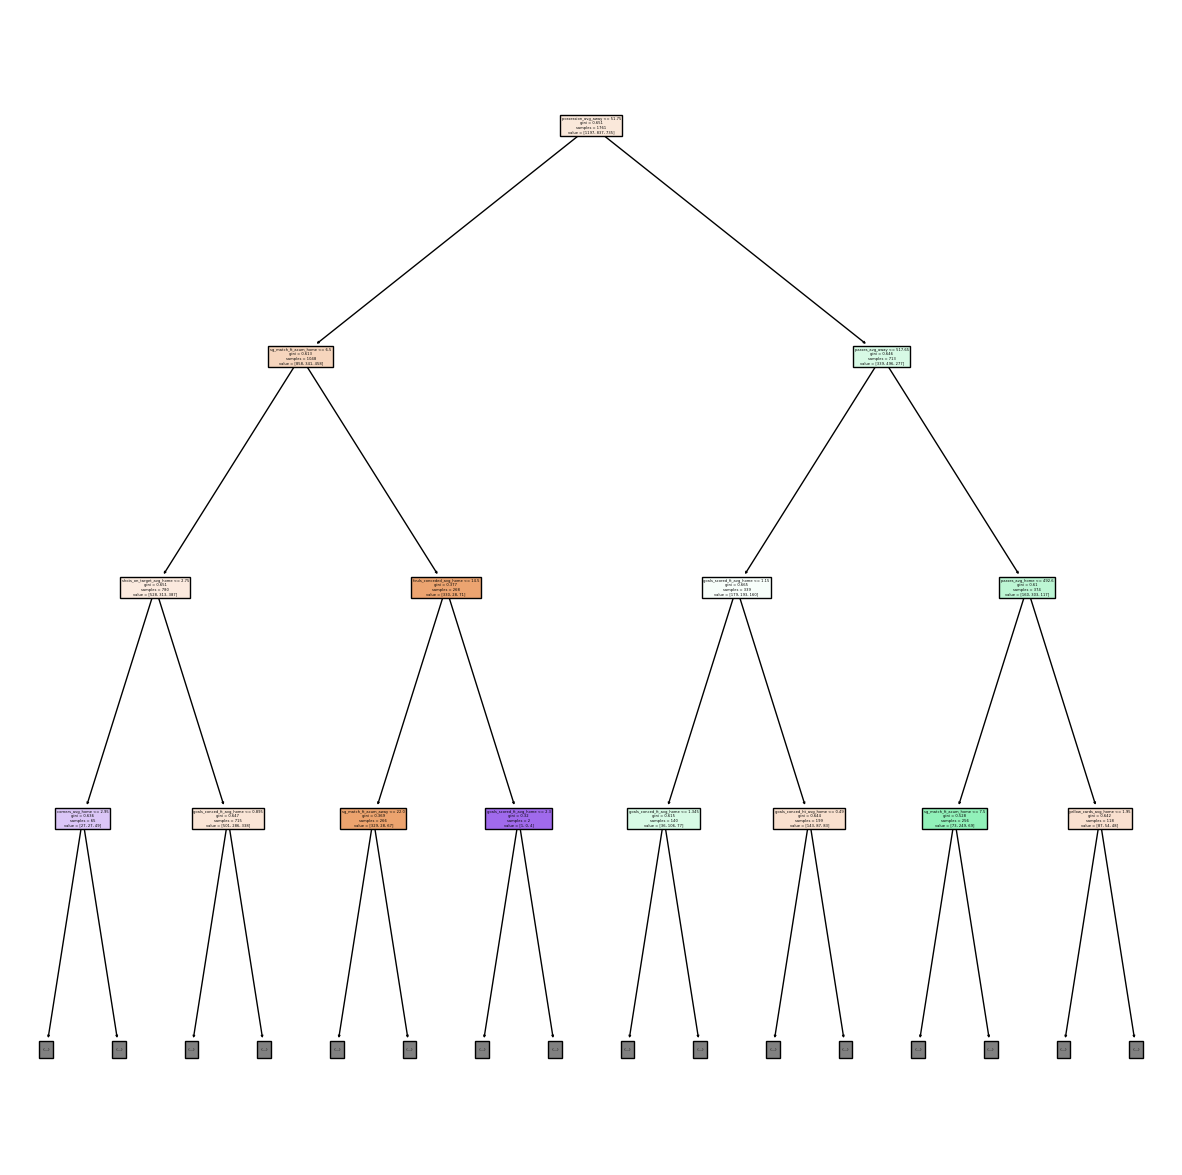

In [21]:
from sklearn.tree import plot_tree

X = beforeMatch.drop('target', axis=1)
y = beforeMatch['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc_sqrt = RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=42)
rfc_log2 = RandomForestClassifier(max_features='log2', oob_score=True, random_state=42)
rfc_none = RandomForestClassifier(max_features=None, oob_score=True, random_state=42)

n_trees = range(3, 264, 20)
oob_scores_sqrt = []
oob_scores_log2 = []
oob_scores_none = []

for n in n_trees:
    rfc_sqrt.set_params(n_estimators=n)
    rfc_sqrt.fit(X_train, y_train)
    oob_scores_sqrt.append(rfc_sqrt.oob_score_)
    
    rfc_log2.set_params(n_estimators=n)
    rfc_log2.fit(X_train, y_train)
    oob_scores_log2.append(rfc_log2.oob_score_)
    
    rfc_none.set_params(n_estimators=n)
    rfc_none.fit(X_train, y_train)
    oob_scores_none.append(rfc_none.oob_score_)
plt.plot(n_trees, oob_scores_sqrt, label='sqrt')
plt.plot(n_trees, oob_scores_log2, label='log2')
plt.plot(n_trees, oob_scores_none, label='None')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.legend()
plt.show()

rfc = RandomForestClassifier(max_features='sqrt', n_estimators=163, oob_score=True, random_state=42)
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy1)
print('Confusion Matrix:\n', conf_matrix)

tree = rfc.estimators_[10]
plt.figure(figsize=(15,15))
plot_tree(tree, feature_names=X_train.columns, filled=True,max_depth=3)
plt.show()


**Written Answer:** 
not great model, the accuracy is low and the three method of selection does not give a big range. Confusion matrix shows that the model does not classify classes correctly especially third class.

### Q2.2 - <span style="color:red">[9]</span> - What are the 5 most important variables for the best (previous) model? Create a barplot reporting their importance scores based on Gini impurity.

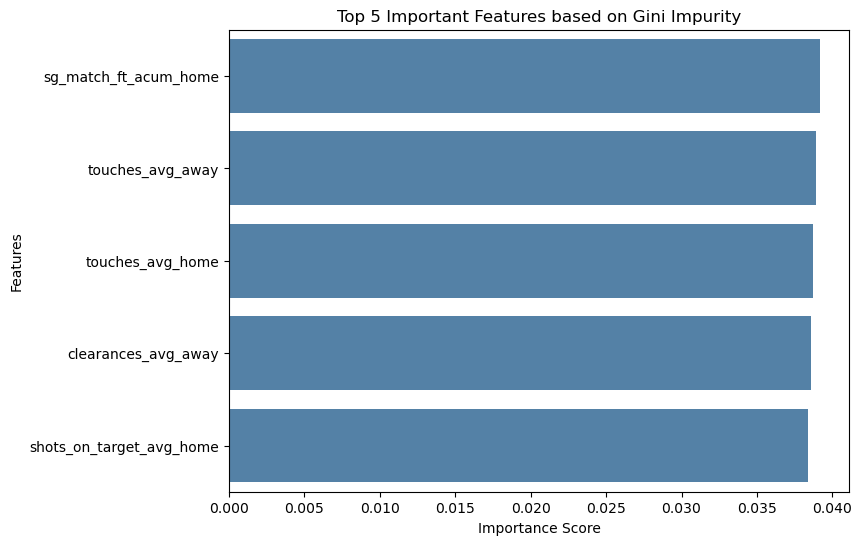

In [11]:
# Instantiate the Random Forest Classifier with the best hyperparameters
rfc = RandomForestClassifier(n_estimators=163, max_features='sqrt', oob_score=True, random_state=seed)

# Fit the model on the entire dataset
rfc.fit(X_train, y_train)

# Extract feature importances
importances = rfc.feature_importances_

# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the dataframe by importance scores
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Select the top 5 important features
top_5_features = feature_importances[:5]

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=top_5_features, color='steelblue')
plt.title('Top 5 Important Features based on Gini Impurity')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [25, 50, 100]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]
 
2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier in this case?

**Points will be deducted if your answer is not in the variable mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

game_train, game_test = train_test_split(beforeMatch.iloc[:, 1:], test_size = 0.3, random_state = seed)
# define the parameter grid
param_grid = dict({
    'n_estimators': [25, 50, 100],
    'max_depth': [8, 25, 42],
    'learning_rate': [0.1, 0.5, 0.9]
})

# create an XGBClassifier object
xgb = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=-1,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            scale_pos_weight=950.0/539.0, # Control the balance of positive and negative weights, useful for unbalanced classes.
                                                          # sum(negative instances) / sum(positive instances)
                            base_score=0.5,               # The initial prediction score of all instances, global bias. Set to average of the target rate.
                            random_state=seed             # Seed
                            )

val_train = game_train.sample(frac = 0.4,               # The fraction to extract
                                       random_state = seed
                                       )
cv_object = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
xgb_cv = GridSearchCV(xgb, param_grid, cv=cv_object, n_jobs=-1,refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1 )

xgb_cv.fit(val_train.iloc[:, :-1], val_train['target'])

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.001,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
           

In [30]:
#best params
xgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50}

In [31]:
xgb_cv.cv_results_

{'mean_fit_time': array([0.53095927, 1.07398934, 2.13882542, 0.72866931, 1.38302908,
        2.35519986, 0.66633377, 1.31242127, 2.60281715, 0.54648271,
        0.93534389, 1.5435411 , 0.64464073, 1.09312415, 1.7277132 ,
        0.67095184, 1.14354067, 1.67412796, 0.49842477, 0.7757144 ,
        1.23493772, 0.52909179, 0.86386375, 1.29387779, 0.53159304,
        0.82515917, 1.20286217]),
 'std_fit_time': array([0.00403738, 0.04069198, 0.03336699, 0.01747886, 0.01146854,
        0.02743429, 0.00965051, 0.02185046, 0.06066586, 0.00589087,
        0.00548415, 0.01157856, 0.00548577, 0.02452875, 0.02581074,
        0.02095011, 0.00770612, 0.03552995, 0.01686139, 0.00861601,
        0.0174344 , 0.01540176, 0.012302  , 0.02713115, 0.01701341,
        0.01641906, 0.08081432]),
 'mean_score_time': array([0.00511684, 0.00657248, 0.00692725, 0.00492463, 0.00578403,
        0.00763788, 0.00516911, 0.00662842, 0.0088542 , 0.00487814,
        0.00576992, 0.00736604, 0.00530844, 0.00607243, 0.007239

In [44]:
XGB_game = XGBClassifier(max_depth=xgb_cv.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=xgb_cv.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=xgb_cv.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,                  # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=seed
                            )

In [45]:

XGB_game.fit(game_train.iloc[:, :-1], game_train['target'])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.001, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=4, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
probTest = XGB_game.predict(game_test[:,:-1])
#probTest = probTest[:, :-1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(game_test['target'], 
                                 probTest)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = game_test['target'], 
                             y_score = probTest),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [65]:
#game_test = pd.game_test.drop('target', axis=1)
y_pred_xgb = XGB_game.predict(game_test[:,:-1])

# compute the accuracy score
accuracy2 = accuracy_score(game_test, y_pred_xgb)


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How would you improve the accuracy of the models? Write no more than 5 sentences.

**Written Answer:** 
-grid search with higher parameter range
-prioritizing highly dependent on target variables,creating new features out of them
-dropping features that do not correlate that much with target


### Q3.3 - <span style="color:red">[9]</span> - What are the 5 most important variables for the XGB classifier? Create a barplot reporting their importance scores based on Gini impurity.

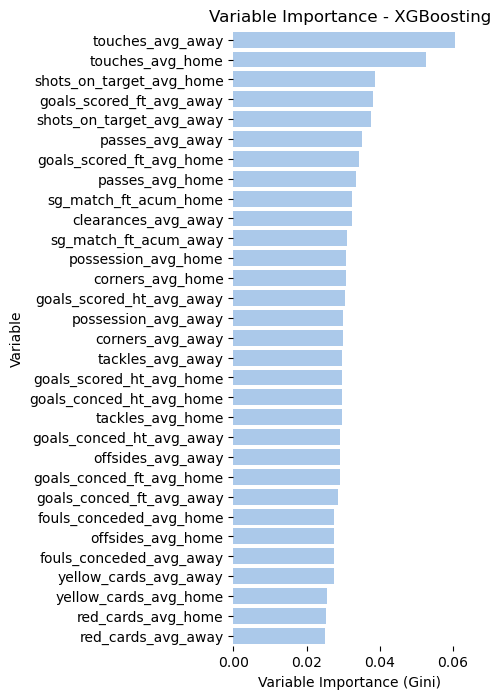

In [70]:
importances = XGB_game.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[game_train.iloc[:, :-1].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)

touches_avg_away,touches_avg_home,shots_on_target_ft_avg_home,goals_scored_ft_avg_home and shots_on_target_ft_avg_away